# Numerical Analysis - IMPA 2020
### Professor Dan Marchesin
### Hallison Paz, 1st year Phd student

## Numerical Integration
--------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

from ipywidgets import interact, interact_manual

In [2]:
import os
OUTPUT_DIR = os.path.join('images', 'integration')

### Simple analytical functions for test

In [3]:
def make_polynomial(coefs):
    '''Returns a function that represents a polynomial with coefficients coefs'''
    def poly(x):
        v = 0
        for i in range(len(coefs)):
            v += coefs[i]*x**i
        return v
    return poly
    
def integrate_polynomial(coefs, a, b):
    '''Integrates a polynomial with coefficients coefs in the interbal a–b'''
    v = 0
    for i in range(len(coefs)):
        v += coefs[i]*(b**(i+1))/(i+1)
        v -= coefs[i]*(a**(i+1))/(i+1)
    return v

#### Checking functions

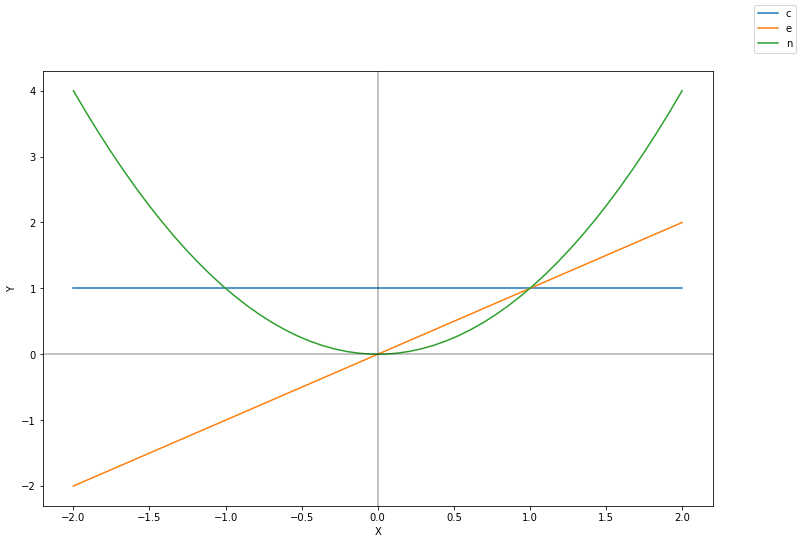

In [4]:
fig = plt.figure(figsize=(12,8))
for i in range(3):
    coefs = [0]*(i+1)
    coefs[i] = 1
    polynomial = make_polynomial(coefs)
    x = np.linspace(-2, 2, 50)
    plt.plot(x, [polynomial(i) for i in x], label='Polynomial degree {}'.format(i))
fig.legend('center right')
plt.axvline(0, color='#11111155')
plt.axhline(0, color='#11111155')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### Integration Methods

In [5]:
def integrate_rect(f, samples):
    v = 0
    for i in range(len(samples)-1):
        mid = (samples[i] + samples[i+1])/2
        v += (samples[i+1] - samples[i])*f(mid)
    return v

def integrate_trapez(f, samples):
    v = 0
    for i in range(len(samples)-1):
        v += (f(samples[i]) + f(samples[i+1]))*(samples[i+1]-samples[i])/2
    return v

In [6]:
integrate_rect(make_polynomial([0, 1]), [0,1])

0.5

In [7]:
integrate_trapez(make_polynomial([0, 1]), [0,1])

0.5

### Integration error measures

In [8]:
def quadrature_error(ground_truth, estimated):
    return ground_truth - estimated

------

In [9]:
def draw_function_integration(f, a=0, b=1, points=2):
    '''draw a function graph and a representation of aproximations of it's integral'''
    
    total_x = np.linspace(-2, 2, 50)
    integration_x = np.linspace(a, b, points)

    fig, axs = plt.subplots(1, 2,figsize=(18, 8))
    rectangles = []
    trapezes = []
    # compute rectangles position
    for i in range(len(integration_x)-1):
        x1, x2 = integration_x[i], integration_x[i+1] 
        mid = (x1 + x2)/2
        verts = [(x1, 0), (x1, f(mid)), (x2, f(mid)), (x2, 0)]
        rectangles.append(Polygon(verts, facecolor='#eff3c6', edgecolor='#eff3c6'))
    
    # compute trapezes position
    for i in range(len(integration_x)-1):
        x1, x2 = integration_x[i], integration_x[i+1] 
        verts = [(x1, 0), (x1, f(x1)), (x2, f(x2)), (x2, 0)]
        trapezes.append(Polygon(verts, facecolor='red', edgecolor='red'))
    # drawing commands
    axs[0].plot(total_x, [f(i) for i in x], label='Rectangles')
    axs[0].add_collection(PatchCollection(rectangles, alpha=0.2))
    
    axs[1].plot(total_x, [f(i) for i in x], label='Trapezes')
    axs[1].add_collection(PatchCollection(trapezes, alpha=0.2))
    
    fig.legend('center right')
    # show coordinates system axis
    for ax in axs:
        ax.axvline(0, color='#11111155')
        ax.axhline(0, color='#11111155')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [16]:
@interact_manual(a=(-2, 2, 0.1),
                b = (-2, 2, 0.1),
                points=(2, 50, 1))
def draw_line_integration(coefficients="0, 1", a=0, b=1, points=2):
    '''draw a line and a representation of integration aproximations'''

    coefs = [float(c) for c in coefficients.split(',')]
    line = make_polynomial(coefs)
    
    print("Ground Truth", integrate_polynomial(coefs, a, b))
    samples = np.linspace(a, b, points)
    print("Rectangle", integrate_rect(line, samples))
    print("Trapeze", integrate_trapez(line, samples))
    
    draw_function_integration(line, a, b, points)

interactive(children=(Text(value='0, 1', description='coefficients'), FloatSlider(value=0.0, description='a', …

In [17]:
@interact_manual(a=(-2, 2, 0.1),
                b = (-2, 2, 0.1),
                points=(2, 50, 1))
def draw_parabola_integration(coefficients="1, 2, -1", a=0, b=1, points=2):
    '''draw a line and a representation of integration aproximations'''
    
    coefs = [float(c) for c in coefficients.split(',')]
    parabola = make_polynomial(coefs)
    
    print("Ground Truth", integrate_polynomial(coefs, a, b))
    samples = np.linspace(a, b, points)
    print("Rectangle", integrate_rect(parabola, samples))
    print("Trapeze", integrate_trapez(parabola, samples))
    
    draw_function_integration(parabola, a, b, points)

interactive(children=(Text(value='1, 2, -1', description='coefficients'), FloatSlider(value=0.0, description='…

## Error comparinson

In [12]:
def draw_polynomial_integration_error(a=0, b=1, maxpoints=10, coefficients="0, 1"):
    coefs = [float(c) for c in coefficients.split(',')]
    polynomial = make_polynomial(coefs)
    
    ground_truth = integrate_polynomial(coefs, a, b)

    errors_rect = []
    errors_trapz = []
    
    samples = range(2, maxpoints+1)
    for points in samples:
        x = np.linspace(a, b, points)
        errors_rect.append(quadrature_error(ground_truth, integrate_rect(polynomial, x)))
        errors_trapz.append(quadrature_error(ground_truth, integrate_trapez(polynomial, x)))

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))
    total_x = np.linspace(-2, 2, 50)
    axs[0].plot(total_x, polynomial(total_x))
    #print(errors_rect)
    axs[1].plot(samples, errors_rect, '-', linewidth=4, label='Rectangle') 
    axs[1].plot(samples, errors_trapz, '-o', label='Trapeze', color='red')
    fig.legend()
    plt.xlabel('Number of Points')
    plt.ylabel('Quadrature Error')
    plt.show()

In [13]:
@interact_manual(a=(-2, 2, 0.1),
                b=(-2, 2, 0.1))
def error_on_line(a=0, b=1, maxpoints=10, coefficients="0, 1"):
    draw_polynomial_integration_error(a, b, maxpoints, coefficients)

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…

In [18]:
@interact_manual(a=(-2, 2, 0.1),
                b=(-2, 2, 0.1),
                maxpoints=(5, 50, 1))
def error_on_parabola(a=0, 
                  b=1, 
                  maxpoints=10,
                     coefficients="0, 0, 1"):
    draw_polynomial_integration_error(a, b, maxpoints, coefficients)

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-2.0), FloatSlider(value=1.0, descr…